In [3]:
##分析1959-1997大气中二氧化碳的含量
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


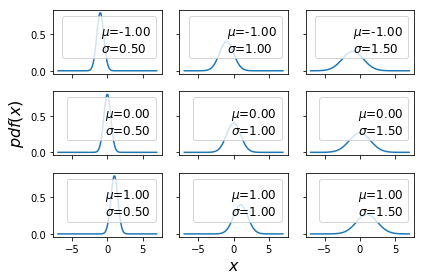

In [4]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x,y)
        ax[i,j].plot(0,0,label="$\\mu$={:3.2f}\n$\\sigma$={:3.2f}".format(mu,sd),alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$x$',fontsize=16)
ax[1,0].set_ylabel('$pdf(x)$',fontsize=16)
plt.tight_layout()
plt.show()

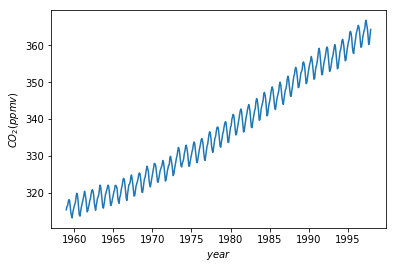

In [5]:
data = np.genfromtxt('./mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:, 0], data[:, 1])
plt.xlabel('$year$')
plt.ylabel('$CO_2 (ppmv)$')
plt.show()


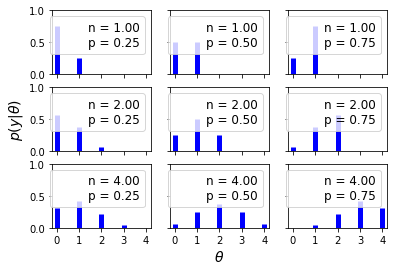

In [6]:
n_params = [1,2,4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params) + 1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n,p=p).pmf(x)
        ax[i,j].vlines(x,0,y,colors='b',lw=5)
        ax[i,j].set_ylim(0,1)
        ax[i,j].plot(0,0,label='n = {:3.2f}\np = {:3.2f}'.format(n,p),alpha=0)
        ax[i,j].legend(fontsize=12)
ax[2,1].set_xlabel('$\\theta$',fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$',fontsize=14)
ax[0,0].set_xticks(x)
    

In [ ]:
def posterior_grid(grid_points=100, heads = 6, tosses=9):
    """A grid implementation for the coin-flip problem"""
    grid = np.linspace(0,1,grid_points)
    prior = np.repeat(5,grid_points)
    likelihood = stats.binom.pmf(heads,tosses,grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid,posterior

##假设4次抛硬币试验中只有1次观测到正面朝上
points = 15
h,n = 1,4
grid,posterior = posterior_grid(points,h,n)
plt.plot(grid,posterior,'o-',label='heads ={}\ntosses={}'.format(h,n))
plt.xlabel(r'$\theta$')
plt.